In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from nltk.tokenize import RegexpTokenizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [6]:
df=pd.read_csv('emotion_sentimen_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [8]:
df.sample(30)

,Unnamed: 0,text,Emotion
830509,830509,i feel inspired as i realize i could do that too,neutral
170635,170635,i am the only one feeling listless and down an...,neutral
350529,350529,i was feeling tottally artistic and decided to...,neutral
447334,447334,i feel confident in leading and managing a cla...,neutral
763012,763012,i feel content and more down to earth when i s...,happiness
21147,21147,i feel its quite a boring no,neutral
128508,128508,i think every day i feel a little more resigne...,neutral
694345,694345,i feel hot tears stream down my battered and b...,neutral
393498,393498,im feeling really exhausted and all i want to ...,neutral
249337,249337,i get so homesick that i feel my body aching f...,neutral


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839555 entries, 0 to 839554
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  839555 non-null  int64 
 1   text        839555 non-null  object
 2   Emotion     839555 non-null  object
dtypes: int64(1), object(2)
memory usage: 19.2+ MB


In [10]:
emotion=df['Emotion'].value_counts()
emotion

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

In [11]:
df.isnull().any()

Unnamed: 0    False
text          False
Emotion       False
dtype: bool

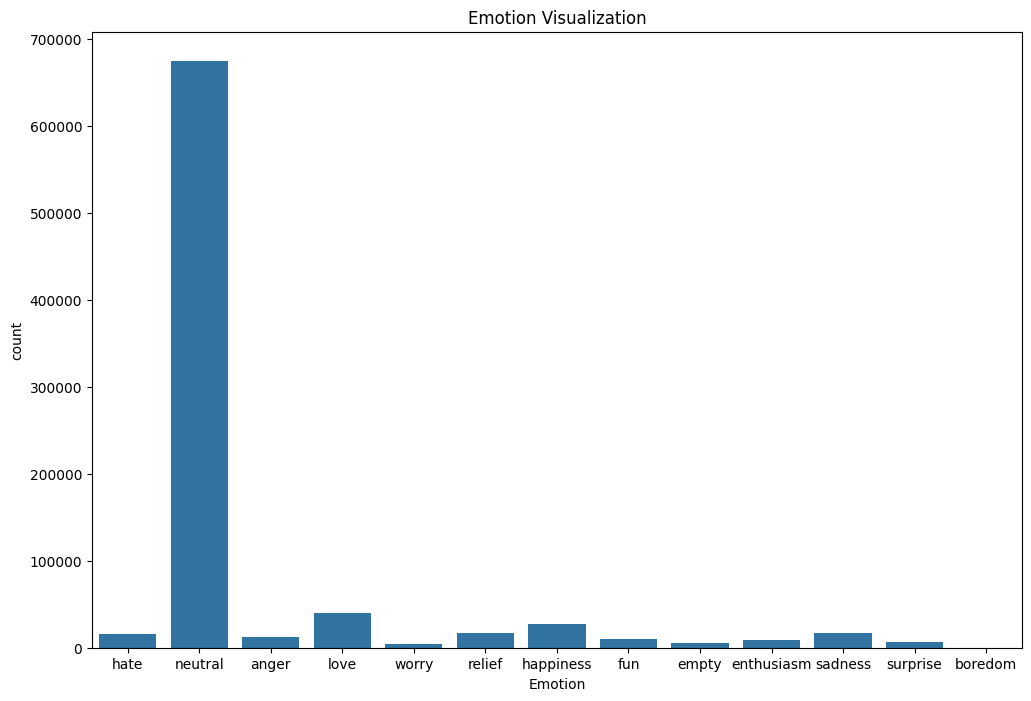

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=df)
plt.title('Emotion Visualization')
plt.show()

In [13]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

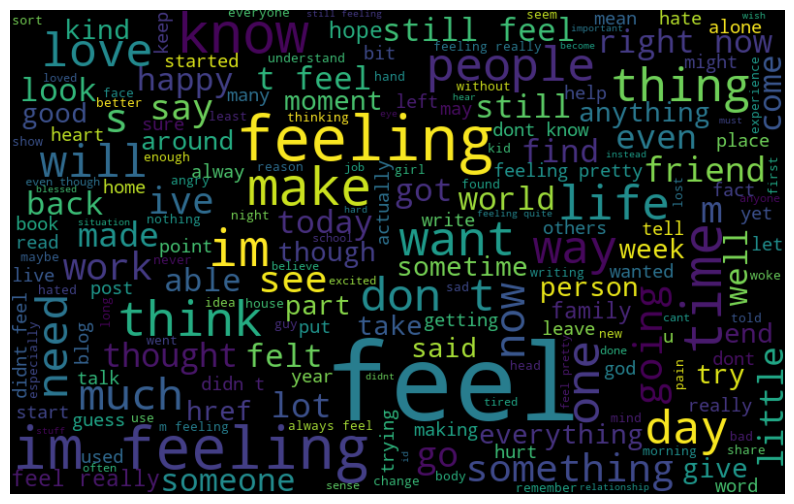

In [14]:
# visualizing
#MOST COMMONLY USED WORDS IN DATASET 
all_words = ' '.join([text for text in df['text'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

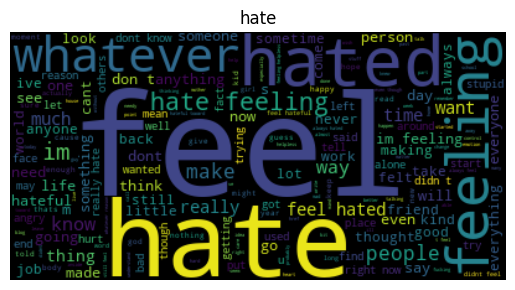

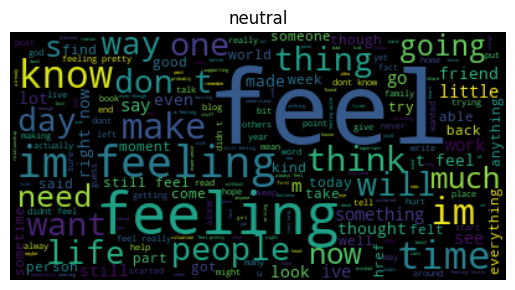

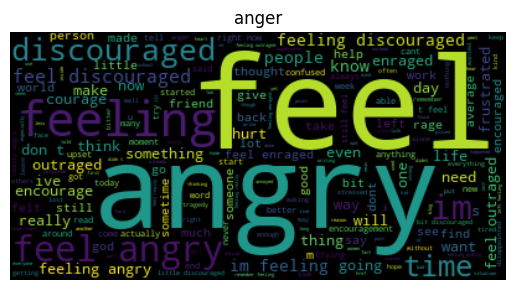

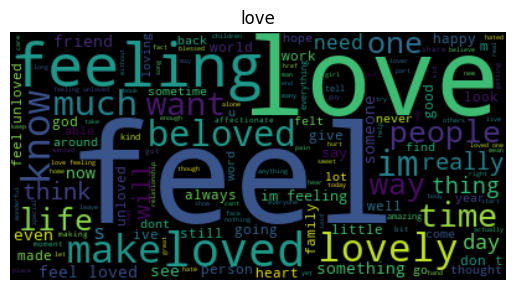

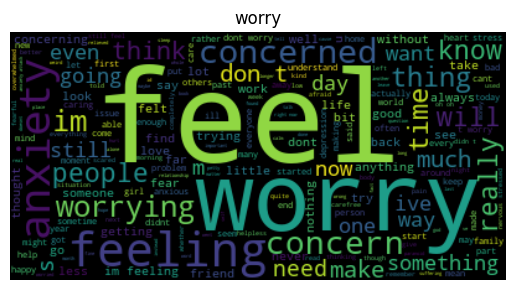

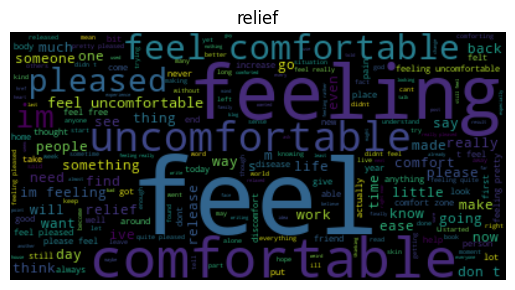

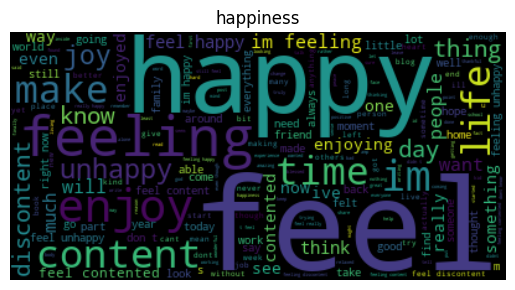

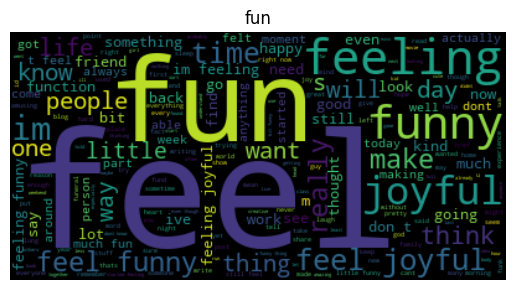

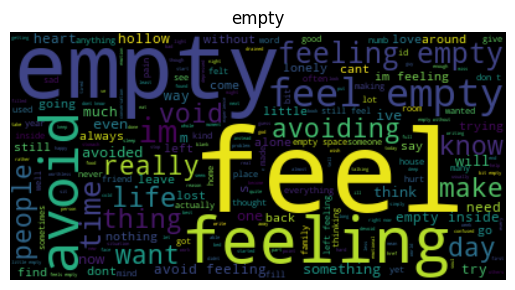

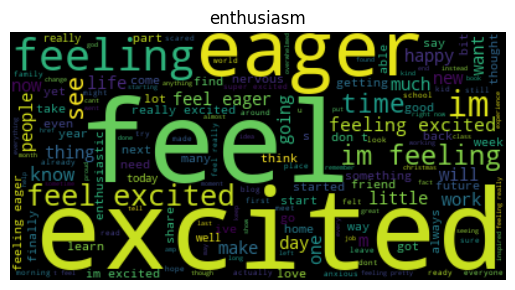

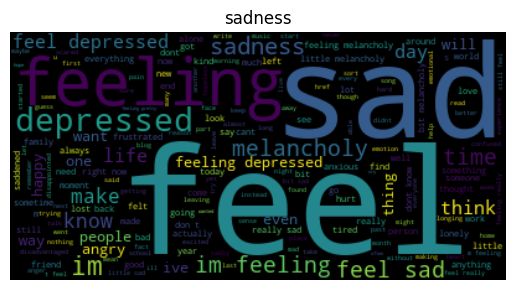

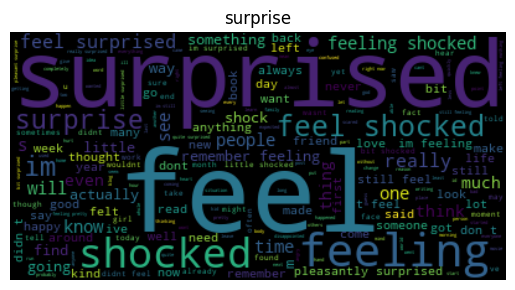

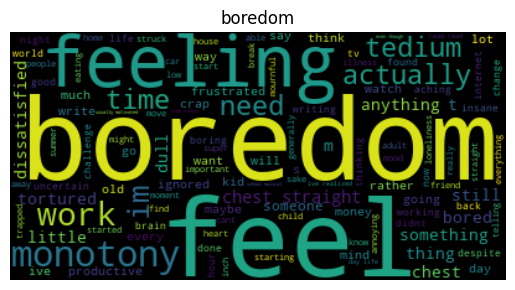

In [15]:
emotions = df['Emotion'].unique()

for emo in emotions:
    emo_words = df[df['Emotion'] == f'{emo}']
    text_emo = " ".join(words for words in emo_words['text'])
    wordcloud = WordCloud().generate(text_emo)

# Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{emo}")
    plt.show()

In [16]:
#DATA PREPROCCESING
#  2.Preprocessing
# -   Segmentation
# -   Tokenization
# -   Stop word removal
# -   Lemmatization
# Segmentation is done to generate sentences from paragraphs or longer texts using transformation rules that segments text into sentences with punctuations or capitalization which denotes beginnings and end of a sentence.
# From our dataset, the text is already segmented into sentences
for txt in df.text.sample(10):
    print(txt)

i feel very thrilled to recall this now
i like it but not in a way that i actually feel emotional about it
i found left me feeling peaceful and warmed hearted
i can feel and understand other people s feelings but i m uncertain about my own right
i am feeling a little less overwhelmed today which i am also so grateful for
i am in the process of figuring out just how to bottle up the feeling of such pleasant relaxing and happy times
i get excluded from things and out of the loop on several things and it makes me feel really unwelcome
i feel privileged to be a part of such an incredible community
i feel like runnning away away to some place real far real far from all the noise and all the traffic real far from all the stress of a fucked up life that we lead in this city far away to some place free of bonds some place where there will be no acquaintances no string attached no money no nothing
i feel like a fake mum


In [25]:
emotions = df['Emotion'].unique()
print(emotions)

['hate' 'neutral' 'anger' 'love' 'worry' 'relief' 'happiness' 'fun'
 'empty' 'enthusiasm' 'sadness' 'surprise' 'boredom']


In [26]:
for emo in emotions:
    for txt in (df[df['Emotion']==emo].text.sample(2)):
        print(emo,":",txt)

hate : i hate those unpleasant feelings that come from those repressed thoughts
hate : i hate feeling insecure encoding utf locale en isprivate false ismobile false ismobilerequest false mobileclass isprivateblog false languagedirection ltr feedlinks link rel alternate type application atom xml title ms
neutral : i feel doomed and cursed sometimes
neutral : i will feel very groggy but after the walk i feel energetic and awake
anger : i now find myself feeling quite angry because if this professor really cared about women s rights or respect for women then how could he disrespect women by harassing them and how could he infringe upon the rights of women while pretending to be bothered by women who he regarded as being oppressed
anger : i feel hopeless discouraged or small writing here reminds me that small isn t a bad thing
love : i feel a bit awkward talking about money but the fact is while i love being a childrens bookseller and have for the last seventeen years i would really like m

In [ ]:
#in here we know that the lines are segmented so we dont use segmentation here

In [37]:
#tokenization
word_tokens =RegexpTokenizer(r'w+|\$[\d\.]+|\S+')
df_copy=df.copy()
df_copy['text']=df_copy['text'].apply(word_tokens.tokenize)

In [39]:
for txts in range(5):
    print("original",df.text[txts])
    print('tokenized',df_copy.text[txts])
    

original i seriously hate one subject to death but now i feel reluctant to drop it
tokenized ['i', 'seriously', 'hate', 'one', 'subject', 'to', 'death', 'but', 'now', 'i', 'feel', 'reluctant', 'to', 'drop', 'it']
original im so full of life i feel appalled
tokenized ['im', 'so', 'full', 'of', 'life', 'i', 'feel', 'appalled']
original i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it
tokenized ['i', 'sit', 'here', 'to', 'w', 'rite', 'i', 'start', 'to', 'dig', 'out', 'my', 'feelings', 'and', 'i', 'think', 'that', 'i', 'am', 'afraid', 'to', 'accept', 'the', 'possibility', 'that', 'he', 'might', 'not', 'make', 'it']
original ive been really angry with r and i feel like an idiot for trusting him in the first place
tokenized ['ive', 'been', 'really', 'angry', 'w', 'ith', 'r', 'and', 'i', 'feel', 'like', 'an', 'idiot', 'for', 'trusting', 'him', 'in', 'the', 'first', 'place']
original i feel suspicious if there i

In [44]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [47]:
def lemmatize_text(text):
    text=' '.join([lemmatizer.lemmatize(word) for word in text if word not in stop_words])
    return text
df_copy['text']=df_copy['text'].apply(lemmatize_text)

In [48]:
for txt in range(5):
    print("original",df.text[txt])
    print('lemmatized',df_copy.text[txt])
    

original i seriously hate one subject to death but now i feel reluctant to drop it
lemmatized seriously hate one subject death feel reluctant drop
original im so full of life i feel appalled
lemmatized im full life feel appalled
original i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it
lemmatized sit w rite start dig feeling think afraid accept possibility might make
original ive been really angry with r and i feel like an idiot for trusting him in the first place
lemmatized ive really angry w ith r feel like idiot trusting first place
original i feel suspicious if there is no one outside like the rapture has happened or something
lemmatized feel suspicious one outside like rapture happened something


In [49]:
x=df_copy['text']
y=df_copy['Emotion']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training set size: ",X_train.shape, y_train.shape)
print("Test set size: ",X_test.shape, y_test.shape)

Training set size:  (671644,) (671644,)
Test set size:  (167911,) (167911,)


In [54]:
#vectorization
vectoriser = TfidfVectorizer(ngram_range=(1,3))
X_train = vectoriser.fit_transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
#model training and optimization
lr_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nTest Set Performance for Logistic Regression:")
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"F1-Score (weighted): {f1_lr}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
lr_model = MultinomialNB(alpha=1, fit_prior=True)
y_pred_lr = lr_model.predict(X_test)

print("\nTest Set Performance for Logistic Regression:")
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"F1-Score (weighted): {f1_lr}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()